In [1]:
import matplotlib.pylab as plt 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 1. Cost functions

Lets focus on linear regression of the form 

$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}.$


#### 1.1 What are the rows of $\mathbf{X}$?

Each row of $\mathbf{X}$ represents an observation: a vector of all the feature values for a single sample. A feature represents an individual measurable property or characteristic. A row, thus, describe entirely one sample of the studied system. The length of a row corresponds to the number of needed feature.

#### 1.2 What are the columns of $\mathbf{X}$?

Each column of $\mathbf{X}$ contains the values of one particular feature for all samples of the system. The length of a column corresponds to the number of studied samples.

Often, we write the equation above as

$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)?

The matrix $\mathbf{\tilde{X}}$ will contain one more row of 1 compared to matrix $\mathbf{X}$. Both equation are represented below.


$$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0} \Leftrightarrow y \approx \left[\begin{matrix} x^{1,1}& ... & x^{1,n}\\ ... &...&...\\ x^{m,1}&...&x^{m,n} \end{matrix}\right]\left[\begin{matrix}
        w_{1,1} \\ ... \\ w_{1,n}
    \end{matrix}\right]+ \mathbf{w_0}$$

$$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w} \Leftrightarrow y\approx \left[\begin{matrix}
       1& x^{1,1}& ... & x^{1,n}\\ 1&... &...&...\\ 1&x^{m,1}&...&x^{m,n}
    \end{matrix}\right] \left[\begin{matrix}
        w_0\\w_{1,1} \\ ... \\ w_{1,n}
    \end{matrix}\right]$$

For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.4 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$

In [2]:
def mean_squared_error(error_vector):
    mean_squared_error = np.mean(error_vector**2)
    return mean_squared_error

print(mean_squared_error(np.array([0,0,0])))  # should return 0

0.0


In [3]:
def mean_absolute_error(error_vector):
    mean_absolute_error = np.mean(np.abs(error_vector))
    return mean_absolute_error

print(mean_absolute_error(np.array([1,1,1])))  # should return 1

1.0


Your code should run as follows

```python
mean_squared_error(np.array([0,0,0]))
> returns 0
```

```python
mean_squared_error(np.array([1,1,1]))
> returns 1
```

#### 1.5 What is the shape of these cost functions as a function of the error

In [4]:
x_axis = np.linspace(-1,1,100) # change as you wish for your plot
y_mae = [mean_absolute_error(x) for x in x_axis]
y_mse = [mean_squared_error(x) for x in x_axis]

Text(0, 0.5, 'cost function')

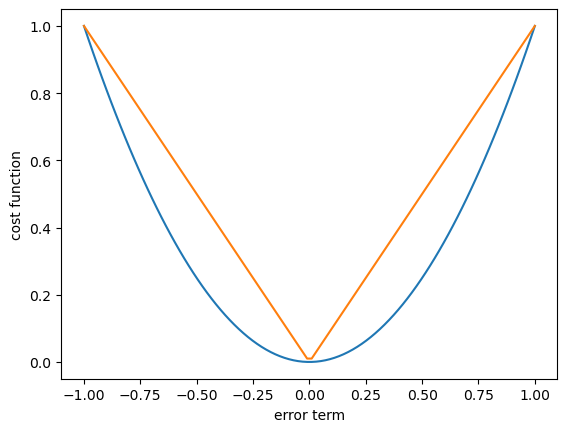

In [5]:
plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')

As shown above, the mean-squared error function is a parabol (U-shaped) and the mean absolute function is V-shaped. Both functions find their minimum at $\epsilon=0$.

#### 1.6  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? What implications does this have for gradient based optimization like gradient descent?

As we can observe on the graph above, the mean-squared error function is quadratic and thus, derivabale and differentiable in $\mathbb{R}$. However, the mean absolute error function is not differentiable in $\epsilon =0$ as the derivative from the left side does not equal the derivative from the right side.

This implies that for MSE, standard gradient descent apply directly and is well defined for all $\epsilon$. However, for MAE, the gradient is not defined at the function's minimum, leading to unstability og the method. The optimization may require the use of subgradients or special-case handling.

#### 1.7 Which loss function is more sensitive to outliers and why?

The mean-squared error function is more sensitive as it squares the error so a large error $\epsilon$ will contribute as $\epsilon ^2$ to the loss. 

# 2. Regularization

Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution

The system presents one unique solution when it is consistent and every unknows is identified uniquely. To achieve such results, the full column rank D should be inferior or equal to the number of rows. Additionaly, D should equal the rank of the matrix $\mathbf{X}$ and the rank of the augmented matrix $\mathbf{X}|y$.
$$D=rank(\mathbf{X})=rank(\mathbf{X}|y)$$

#### 2.2 No solution

The system does not present any solution when it is inconsistent. In other terms, the rank of the augmented matrix has to be larger than the rank of the coefficient matrix.
$$rank(\mathbf{X}|y)> rank(\mathbf{X})$$

#### 2.3 An infinite number of solutions

The system presents an infinite number of solutions when it is consistent but undetermined. This happens when the number of linearly independant columns (the matrix rank) is inferior to the full column rank causing the unidentification of variables.
$$D>rank(\mathbf{X})=rank(\mathbf{X}|y)$$

#### 2.4 Give a geometrical interpretation of the matrix Rank (10 bonus point if you use the Manim package)

The rank of a matrix denotes the number of linearly independant columns contained in the matrix. As they are independant, these columns may form a basis for a subspace of which the dimension is given by the rank of the matrix. Thus, the geometrical interpretation of the matrix rank is the number of dimensions the subspace spanned by the matrix has.

In [18]:
from manim import *

class MatrixRank(ThreeDScene):
    def construct(self):
        # Axes setup
        axes = ThreeDAxes(x_range=[-2, 2], y_range=[-2, 2], z_range=[-2, 2])
        labels = axes.get_axis_labels(x_label="x", y_label="y", z_label="z")
        self.set_camera_orientation(phi=70 * DEGREES, theta=30 * DEGREES)
        self.add(axes, labels)

        # --- Case 1: Rank = 1 (one vector) ---
        v1 = np.array([1, 1, 0])
        vec1 = Arrow3D(start=ORIGIN, end=v1, color=BLUE)
        text1 = Text("Rank = 1: Line").scale(0.5).to_corner(UL)
        self.play(GrowArrow(vec1), Write(text1))
        self.wait(2)

        # --- Case 2: Rank = 2 (two independent vectors) ---
        v2 = np.array([1, -1, 0])
        vec2 = Arrow3D(start=ORIGIN, end=v2, color=GREEN)
        plane = Polygon(ORIGIN, v1, v1 + v2, v2, color=YELLOW, fill_opacity=0.3)
        self.play(GrowArrow(vec2))
        self.wait(1)
        self.play(Create(plane))
        self.play(Transform(text1, Text("Rank = 2: Plane").scale(0.5).to_corner(UL)))
        self.wait(2)

        # --- Case 3: Rank = 3 (three independent vectors) ---
        v3 = np.array([0, 0, 1])
        vec3 = Arrow3D(start=ORIGIN, end=v3, color=RED)
        cube = Cube(side_length=1.5, color=WHITE, fill_opacity=0.05)
        self.play(GrowArrow(vec3))
        self.wait(1)
        self.play(FadeIn(cube))
        self.play(Transform(text1, Text("Rank = 3: Full 3D Space").scale(0.5).to_corner(UL)))
        self.wait(2)

        self.play(FadeOut(VGroup(vec1, vec2, vec3, plane, cube, text1, axes, labels)))
        self.wait(1)


#### 2.5 In general, why can't we solve the linear equation using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\textbf{w}$? (1 point)

The matrix $\mathbf{\tilde{X}}$ is usually not squared and is not necesserably invertible. Thus, in most cases, the matrix $\mathbf{\tilde{X}}^{-1}$ does not exist.

#### 2.6 Differentiate above formula step by step and show what will we have?

Let's start by expanding the given formula:
$$J(w)=||y-\tilde{X}w||^2_2=(y-\tilde{X}w)^T(y-\tilde{X}w)=y^T y-y^T \tilde{X}w-w^T \tilde{X}^T y+w^T \tilde{X}^T \tilde{X}w$$
We observe that:
$$y^T\tilde{X}w=\tilde{X}^Tw^T y$$
Giving the final equation for $J(w)$:
$$J(w)=y^Ty-2\tilde{X}^Tw^Ty+w^T\tilde{X}^T\tilde{X}w$$

We now want to differentiate this equation with respect to $w$ keeping in mind that $w$ is a vector:
$$\nabla_wJ(w)=-2\tilde{X}^Ty+2\tilde{X}^T\tilde{X}w$$

The formula was successfully differentiated. The symmetry of $\tilde{X}^T\tilde{X}$ was used to derive the last term.

#### 2.7 if we want $\| y - \tilde{X} w \|_2^2$ to be minimum, what should the derivative be equal to?

To minimize the given formula, the derivative should be equal to 0 giving us the following relation:
$$-2\tilde{X}^Ty+2\tilde{X}^T\tilde{X}w=0 \Leftrightarrow \tilde{X}^Ty=\tilde{X}^T\tilde{X}w$$

Solving for $w$ gives us:
$$w=(\tilde{X}^T\tilde{X})^{-1} \tilde{X}^Ty$$

#### 2.8 What is the Hat matrix and what does its diagonal values correspond to?

Substituting $\hat{y}=\tilde{X}w$ in the previous equation for $w$ gives us:
$$\hat{y}=\tilde{X}(\tilde{X}^T\tilde{X})^{-1} \tilde{X}^Ty$$

The hat matrix H given by 
$$H= \tilde{X}(\tilde{X}^T\tilde{X})^{-1} \tilde{X}^T$$
is a projection matrix that informs us on the closest point in least-squares sense to y in the subspace spanned by the matrix $\tilde{X}$ (subspace spanned by the model features).
$$\hat{y}=Hy$$

Each diagonal value $h_{ii}$ is called the leverage of observation i. for each observed value $y_i$, the leverage measures how much the fitted value $\hat{y}_i$ depends on it. If $h_{ii}$ is large, the corresponding data point will strongly impact the fitted line and vice-versa.

#### 2.9 What is William’s plot and how does it help in outlier detection?

William's plot exhibit the relation of standardized residuals in function of the leverages $h_{ii}$ as a scatter plot.

It is widely used because of its practicity in highlighting outliers. Indeed, large standardized residuals as well as large leverage are two factors that indicate significant influence on the fitted curve. A data point with both high x and y values is a good condidate for further inspection or removal.

#### 2.10 What happens if some columns are linearly dependent? What is the connection to feature selection?

If some columns are linearly dependant, the system of equation $y\simeq \tilde{X }W$ will yield an infinite number of solutions. Consequently, the matrix $\tilde{X}^T \tilde{X}$ will not be invertible.

Linearly dependent columns indicates redundant features that could be removed. (The feature selection can be optimized by reviewing the choice of similar features.)

#### 2.11 What will be the new cost function after adding the regularization term?

The new corst function will bo in form of:
$$J_\lambda(w)=||y-\tilde{X}w||_2^2 +\lambda ||w||_2^2 =(y-\tilde{X}w)^T(y-\tilde{X}w)+\lambda w^Tw$$
with $\lambda\geq 0$

#### 2.12 What will be the new 𝑤 when we differentiate the new cost function and set it to zero.

Differentiation with respect to $w$ of the previous relation gives:
$$\nabla _w J_\lambda (w)=-2\tilde{X}^Ty+2\tilde{X}^T \tilde{X} w +2\lambda w$$

The derivative is set to equal 0 to obtain a minimum:
$$\nabla _w J_\lambda (w)=0 \Leftrightarrow   (\tilde{X}^T \tilde{X}+\lambda I)w = \tilde{X}^Ty $$

Finally, solving for $w$ gives:
$$w=(\tilde{X}^T \tilde{X}+\lambda I)^{-1}\tilde{X}^Ty


#### 2.13 Prove that the part of Hat matrix where we want to take the inverse from is always reversible after we introduce the regularization term.

We want to show that $\tilde{X}^T \tilde{X}+\lambda I$ is always invertible.

let $z$ be a nonzero vector of dimension D+1. Consider the quadratic form:
$$z^T(\tilde{X}^T \tilde{X}+\lambda I)z = z^T\tilde{X}^T\tilde{X}z + \lambda z^Tz= ||\tilde{X}z||_2^2 + \lambda ||z||_2^2$$
This last expression is positive and not equal to 0 as, by definition, $\lambda >0$ and z is nonzero.

The matrix is, thus, positive definite and, consequently, invertible.



#### 2.14  What is the shape of the parabola as a function of $a$?

In [7]:
def parabola(x, a = 1): 
    return a * x ** 2

In [8]:
x_axis_parabola = np.linspace(-10, 10, 100)

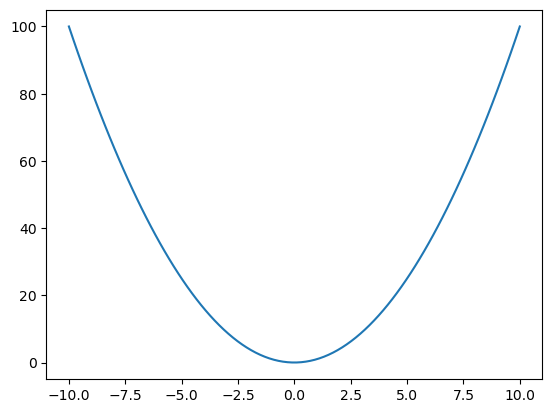

In [9]:
plt.plot(x_axis_parabola, parabola(x_axis_parabola))

__< Your answer >__

#### 2.15 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [10]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [11]:
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis

In [12]:
n_samples = 10 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise

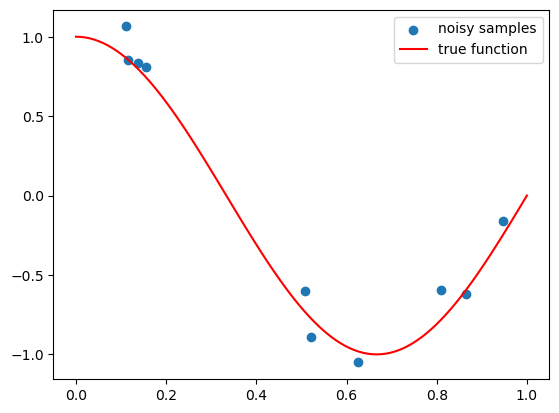

In [13]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

The following code will fit a polynomial regression, you need to fill the degree

In [14]:
polynomial_features = PolynomialFeatures(degree=#FILLEME,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

SyntaxError: invalid syntax (1035794253.py, line 2)

To plot the result, you can use the following code

In [ ]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

In [ ]:
polynomial_features = PolynomialFeatures(degree=#fillme,
                                             include_bias=False)
ridge_regression = Ridge(alpha=#fillme)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


For plotting you can reuse the following code

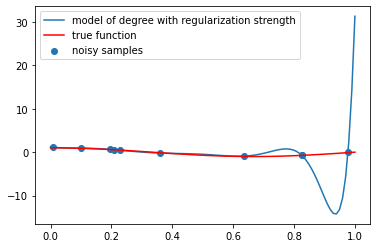

In [ ]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

#### 2.16 What do you observe if you change the number of samples from the function?

__< Your answer >__

#### 2.17 Why do we need a test set in machine learning?

__< Your answer >__

#### 2.18 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (1 point)

__< Your answer >__